# Обучение ограниченной машине Больцмана (RBM)
### Применение к набору данных MNIST

#### Настройки

In [1]:
%cd ../code/NN/

/home/greed/Projects/Education/Python/education-deep-learning/code/NN


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rbm import RBM
from nn.nn import NN
from nn.utils import load_data, binarize_data
from nn.visualization import print_image

#### Загрузка и бинаризация данных

In [3]:
X_train, X_valid, X_test, y_train, y_valid, y_test = \
    load_data('../../data/digitstrain.txt',
              '../../data/digitsvalid.txt',
              '../../data/digitstest.txt')

In [4]:
X_train.shape, y_train.shape

((3000, 784), (3000, 10))

In [5]:
X_train = binarize_data(X_train)
X_valid = binarize_data(X_valid)
X_test  = binarize_data(X_test)

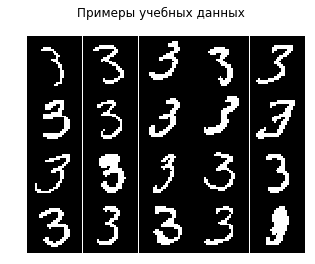

In [6]:
print_image(X_train[1160:1180, :], output_shape=(4, 5), 
            title='Примеры учебных данных')
None # должен быть двоичным

## (a) Основное обобщение

### Инициализация модели

Массивы $W \in \mathbb{R}^{n_{hidden} \times n_{visible}}$ инициализируются из a $\mathrm{Unif}(-u, u)$, где $u = \frac{\sqrt{6}}{\sqrt{n_{visible}+n_{hidden}}}$, как описано в лекции. Cмещения инициализируются нулем.

Уровень обучения инициализируется равным 0,2 и уменьшается через каждые 100 эпох.

In [7]:
rbm = RBM(n_visible=784, n_hidden=100, k=1,
          learning_rate=0.2, early_stopping=True,
          seed=2)

In [8]:
rbm.W.shape, rbm.b.shape, rbm.c.shape

((100, 784), (100, 1), (784, 1))

### Обучение

Ошибка кросс-энтропии вычисляется как среднее по всему набору данных обучения (или валидации) и суммируется по всем измерениям.

In [9]:
n_epoch = 500
rbm.train(X_train, X_valid,
          batch_size=200, n_epoch=n_epoch, batch_seed=25, 
          verbose=True)
None

|-------|---------------------------|---------------------------|
| Epoch |         Training          |         Validation        |
|-------|---------------------------|---------------------------|
|   #   |       Cross-Entropy       |       Cross-Entropy       |
|-------|---------------------------|---------------------------|
|    1  |         393.65588         |         397.89379         |
|    2  |         229.50594         |         231.53837         |
|    3  |         172.96877         |         174.83468         |
|    4  |         156.34998         |         158.09959         |
|    5  |         146.58598         |         148.57790         |
|    6  |         139.77583         |         141.58867         |
|    7  |         135.19412         |         137.34872         |
|    8  |         130.99752         |         133.01107         |
|    9  |         127.47616         |         129.96284         |
|   10  |         127.66920         |         130.25857         |
|   11  | 

|  121  |          76.33795         |          85.33659         |
|  122  |          76.59575         |          85.43688         |
|  123  |          76.14351         |          84.91981         |
|  124  |          76.13645         |          84.92774         |
|  125  |          76.04770         |          85.25551         |
|  126  |          75.91532         |          84.89217         |
|  127  |          75.94661         |          84.74814         |
|  128  |          75.79079         |          84.92207         |
|  129  |          75.84882         |          84.99847         |
|  130  |          75.97618         |          85.02561         |
|  131  |          76.15893         |          85.27733         |
|  132  |          75.62782         |          84.75448         |
|  133  |          75.63631         |          84.61902         |
|  134  |          75.63080         |          84.92307         |
|  135  |          75.38302         |          84.60258         |
|  136  | 

|  246  |          71.59818         |          82.19101         |
|  247  |          71.67814         |          82.06252         |
|  248  |          71.71552         |          82.27336         |
|  249  |          71.77711         |          82.19538         |
|  250  |          71.63822         |          81.92665         |
|  251  |          71.56944         |          82.31067         |
|  252  |          71.65227         |          81.97456         |
|  253  |          71.59857         |          82.44742         |
|  254  |          71.72872         |          82.15838         |
|  255  |          71.52971         |          82.01258         |
|  256  |          71.43629         |          81.89044         |
|  257  |          71.38836         |          81.94548         |
|  258  |          71.37845         |          81.83789         |
|  259  |          71.50900         |          82.07728         |
|  260  |          71.42979         |          82.01344         |
|  261  | 

|  371  |          69.85749         |          81.23415         |
|  372  |          69.78473         |          80.75998         |
|  373  |          69.75665         |          81.02670         |
|  374  |          69.85081         |          80.94648         |
|  375  |          69.68216         |          80.95464         |
|  376  |          69.79649         |          80.83759         |
|  377  |          69.77475         |          80.98441         |
|  378  |          69.73573         |          80.97194         |
|  379  |          69.75158         |          80.66465         |
|  380  |          69.78092         |          80.68126         |
|  381  |          69.75840         |          81.11131         |
|  382  |          69.67905         |          80.64345         |
|  383  |          69.81030         |          81.12871         |
|  384  |          69.68015         |          80.85835         |
|  385  |          69.65199         |          80.59439         |
|  386  | 

|  496  |          68.87004         |          80.31490         |
|  497  |          68.74284         |          80.23542         |
|  498  |          68.64393         |          80.33181         |
|  499  |          68.66219         |          80.02814         |
|  500  |          68.72781         |          80.47961         |
|-------|---------------------------|---------------------------|


Затем отображается графики ошибок обучения и проверки. Ошибка проверки начинает расти примерно в 130 эпох.

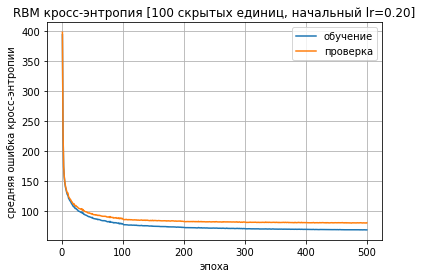

In [10]:
plt.grid()
plt.plot(*zip(*rbm.training_error), label='обучение')
plt.plot(*zip(*rbm.validation_error), label='проверка')
plt.title('RBM кросс-энтропия [100 скрытых единиц, начальный lr={:.2f}]'.format(rbm.learning_rate.const))
plt.xlabel('эпоха')
plt.ylabel('средняя ошибка кросс-энтропии')
plt.legend()
plt.show()

Для эксперемента обучаем еще 5 нейронных сетей с разными инициализациями.

In [12]:
rbms = [rbm]
for i in range(1, 6):
    rbm0 = RBM(n_visible=784, n_hidden=100, k=1,
               learning_rate=0.2, early_stopping=True,
               seed=44*i)
    rbm0.train(X_train, X_valid,
               batch_size=200, n_epoch=n_epoch, batch_seed=25, 
               verbose=False)  # silent run
    rbms.append(rbm0)
    print('RBM #{:d} обучение завершено ({:d} эпох)'.format(i, n_epoch))
    print('Финальная ошибка обучения: {:.5f}'.format(rbm0.training_error[-1][1]))
    print('Финальная ошибка проверки: {:.5f}'.format(rbm0.validation_error[-1][1]))

RBM #1 обучение завершено (500 эпох)
Финальная ошибка обучения: 66.30247
Финальная ошибка проверки: 78.19029
RBM #2 обучение завершено (500 эпох)
Финальная ошибка обучения: 67.74223
Финальная ошибка проверки: 79.11827
RBM #3 обучение завершено (500 эпох)
Финальная ошибка обучения: 66.09316
Финальная ошибка проверки: 77.45955
RBM #4 обучение завершено (500 эпох)
Финальная ошибка обучения: 67.55387
Финальная ошибка проверки: 78.49976
RBM #5 обучение завершено (500 эпох)
Финальная ошибка обучения: 66.89910
Финальная ошибка проверки: 78.08251


Похоже, что ошибки кросс-энтропии валидации примерно одинаковы для разных инициализаций. Поэтому, можно перейти к первой модели.

### Визуализация параметров

Сначала берутся первые скрытые единицы слоя и помечаются как изображения. Как показано ниже, фильтры, похоже, захватывают фигуры в виде цифр.

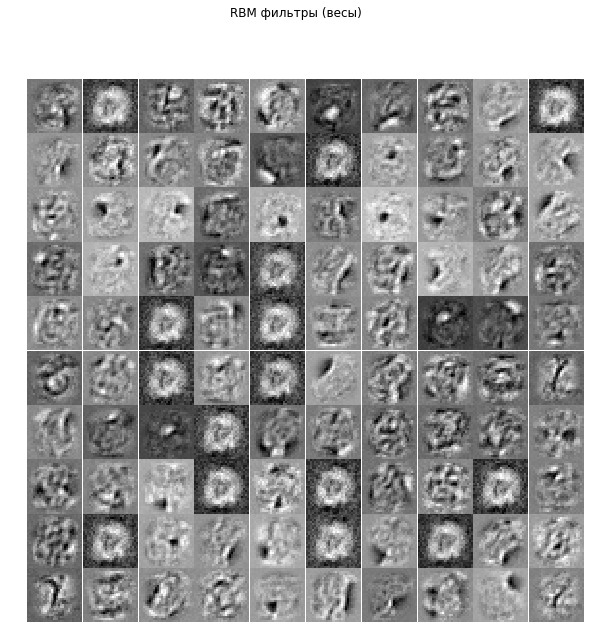

In [13]:
assert rbm.W.shape[0] >= 100
print_image(rbm.W[:100,:], output_shape=(10, 10),
            title='RBM фильтры (весы)')
None

Затем генерируются 25 скрытых состояний из случайной выборки данных обучения размером 25. Скрытые единицы не видят захвата какой-либо конкретной структуры.

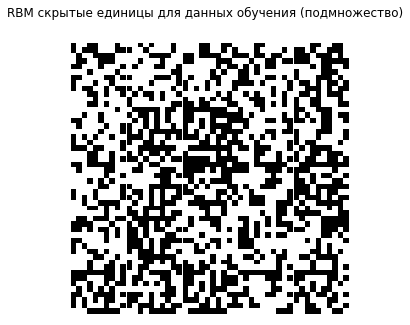

In [14]:
rng    = np.random.RandomState(1)
subset = rng.choice(np.arange(X_train.shape[0]), 25, replace=False)

hidden_units = rbm.sample_from_posterior(X_train[subset, :])
print_image(hidden_units, output_shape=(5, 5),
            title='RBM скрытые единицы для данных обучения (подмножество)')
None

Наконец, генерируются 25 новых отрицательных выборок, случайным образом генерируемых из обученного RBM. Они на самом деле выглядят довольно похожими на реальные цифры, но с некоторым шумом.

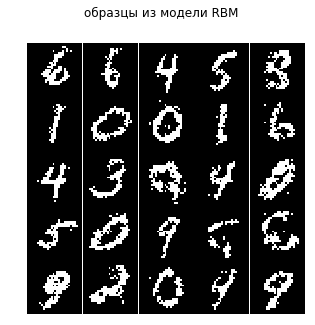

In [15]:
rng    = np.random.RandomState(1)
subset = rng.choice(np.arange(X_train.shape[0]), 25, replace=False)

X_neg = rbm.generate_negative_sample(X_train[subset, :])
print_image(X_neg, output_shape=(5, 5),
            title='образцы из модели RBM')
None

## (b) Количество шагов CD

Выполнение шагов $k = 5, 10, 20$ для генерации отрицательных выборок в алгоритме CD.

In [16]:
n_epoch = 400
rbms = []
ks = [5, 10, 20]
for i, k in enumerate(ks):
    rbm0 = RBM(n_visible=784, n_hidden=100, k=k,
               learning_rate=0.2, early_stopping=True,
               seed=100)
    rbm0.train(X_train, X_valid,
               batch_size=200, n_epoch=n_epoch, batch_seed=25, 
               verbose=False)  # silent run
    rbms.append(rbm0)
    print('RBM #{:d} (CD-k={:d}) обучение завершено ({:d} эпох)'.format(i, k, n_epoch))
    print('Финальная ошибка обучения: {:.5f}'.format(rbm0.training_error[-1][1]))
    print('Финальная ошибка проверки: {:.5f}'.format(rbm0.validation_error[-1][1]))

RBM #0 (CD-k=5) обучение завершено (400 эпох)
Финальная ошибка обучения: 70.07347
Финальная ошибка проверки: 81.28349
RBM #1 (CD-k=10) обучение завершено (400 эпох)
Финальная ошибка обучения: 71.87784
Финальная ошибка проверки: 82.93017
RBM #2 (CD-k=20) обучение завершено (400 эпох)
Финальная ошибка обучения: 71.68234
Финальная ошибка проверки: 82.87832


## (c) Примеры из модели RBM

Здесь берутся 100 образцов новых изображений из обученной модели, начиная с 100 случайных видимых единиц и запуская 1000 шагов выборки Гиббса для каждого из 100 случайных входов.

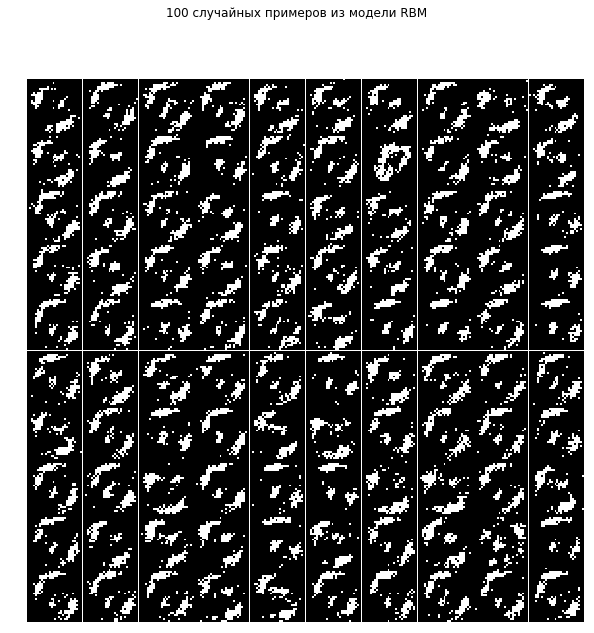

In [17]:
# Задается количество шагов Гиббса до 1000
rbm.k    = 1000
# Генерируется случайные исходные примеры
X_random = rng.binomial(1, 0.5*np.ones((100, 784)))
# Запуск шагов Гиббса
X_new    = rbm.generate_negative_sample(X_random)
# Восстановление значений по умолчанию
rbm.k    = 1
# Вывод цифр
print_image(X_new, output_shape=(10, 10),
            title='100 случайных примеров из модели RBM')
None

Хотя они не выглядят как идеальные цифры, они определенно напоминают некоторые цифры. Возможно, настроить эту модель и работать более интенсивно, чтобы получить идеальные цифры.

## (d) Неконтролируемое обучение как предварительная подготовка

Здесь обучается 1-слойная нейронную сеть с весами, полученными из RBM, и сравнивается со случайным образом инициализированным весом.

In [18]:
# Случайная инициализация
nn_random = NN(architecture=[784, 100, 10], 
               activation='sigmoid', learning_rate=0.01, momentum=0.7,
               weight_decay=1e-4, dropout=0.0, early_stopping=True, 
               seed=40)
nn_random.train(X_train, y_train, X_valid, y_valid,
                batch_size=200, n_epoch=n_epoch, batch_seed=25,
                verbose=False)  # silent run
None

In [19]:
# Инициализация с использованием RBM
nn_rbm = NN(architecture=[784, 100, 10], 
            activation='sigmoid', learning_rate=0.01, momentum=0.7,
            weight_decay=1e-4, dropout=0.0, early_stopping=True, 
            seed=40)
nn_rbm.layers[0].W = rbm.W
nn_rbm.train(X_train, y_train, X_valid, y_valid,
             batch_size=200, n_epoch=n_epoch, batch_seed=25,
             verbose=False)  # silent run
None

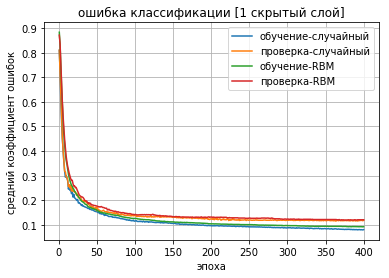

In [20]:
# Частота ошибок
plt.grid()
plt.plot(*zip(*nn_random.training_error), label='обучение-случайный')
plt.plot(*zip(*nn_random.validation_error), label='проверка-случайный')
plt.plot(*zip(*nn_rbm.training_error), label='обучение-RBM')
plt.plot(*zip(*nn_rbm.validation_error), label='проверка-RBM')
plt.title('ошибка классификации [1 скрытый слой]')
plt.xlabel('эпоха')
plt.ylabel('средний коэффициент ошибок')
plt.legend()
plt.show()

Похоже, что предварительная подготовка на самом деле не помогает с частотой ошибок. Это возможно, потому что RBM тренировался только по тому же количеству примеров (фактически такой же набор тренировок), чтобы он не обязательно предоставлял какую-либо новую информацию. Если бы был гораздо больший немаркированный набор данных, что часто бывает в реальных приложениях, предварительная подготовка может дать огромный импульс в производительности.

## (g) Количество скрытых единиц * [для RBM] *

###### Смотреть `autoencoder_mnist.ipynb`  для этого эксперемента с автоэнкодером.

Учитывая предыдущие результаты, используется $k = 1$ и меняется количество скрытых единиц.

In [21]:
rbms = []
n_hidden_units = [50, 100, 200, 500]
for i, n_hidden in enumerate(n_hidden_units):
    rbm0 = RBM(n_visible=784, n_hidden=n_hidden, k=1,
               learning_rate=0.2, early_stopping=True,
               seed=100)
    rbm0.train(X_train, X_valid,
               batch_size=200, n_epoch=n_epoch, batch_seed=25, 
               verbose=False)  # silent run
    rbms.append(rbm0)
    print('RBM #{:d} с {:d} скрытыми слоями обучение завершено ({:d} эпох)'.format(i, n_hidden, n_epoch))
    print('Финальная ошика обучение: {:.5f}'.format(rbm0.training_error[-1][1]))
    print('Финальная ошика проверки: {:.5f}'.format(rbm0.validation_error[-1][1]))

RBM #0 с 50 скрытыми слоями обучение завершено (400 эпох)
Финальная ошика обучение: 98.97038
Финальная ошика проверки: 105.57159
RBM #1 с 100 скрытыми слоями обучение завершено (400 эпох)
Финальная ошика обучение: 68.66058
Финальная ошика проверки: 79.69896
RBM #2 с 200 скрытыми слоями обучение завершено (400 эпох)
Финальная ошика обучение: 45.70223
Финальная ошика проверки: 62.48101
======Early stopping: validation error increase at epoch 136=====
RBM #3 с 500 скрытыми слоями обучение завершено (400 эпох)
Финальная ошика обучение: 37.86195
Финальная ошика проверки: 55.23484


Похоже, что использование большего количества единиц напрямую приводит к меньшей ошибке кросс-энтропии, по крайней мере, в течение 200 эпох. Можно подумать о том, чтобы переусердствовать здесь. Мы генерируем 1000-шаговые образцы Гиббса из RB-слоев 50 слоев и 500 слоев ниже (соответственно):

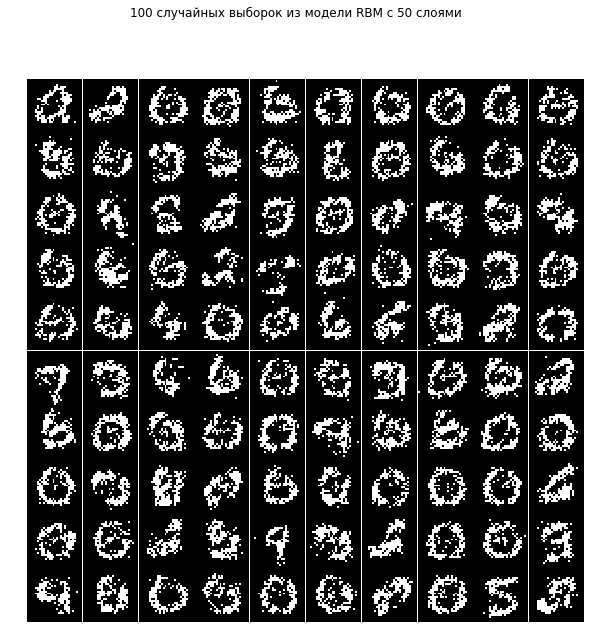

In [23]:
rbm50 = rbms[0]
# Задается количество шагов Гиббса до 1000
rbm50.k    = 1000
# Генерация случайных исходных примеров
X_random = rng.binomial(1, 0.5*np.ones((100, 784)))
# Запуск шагов Гиббса
X_new    = rbm50.generate_negative_sample(X_random)
# Восстановление значений по умолчанию
rbm50.k    = 1
# Вывод цифр
print_image(X_new, output_shape=(10, 10),
            title='100 случайных выборок из модели RBM с 50 слоями')
None

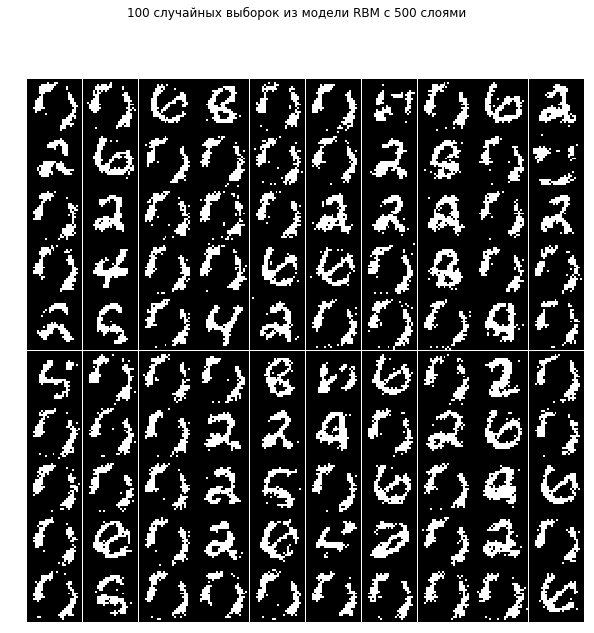

In [24]:
rbm500 = rbms[3]
# Задается количество шагов Гиббса до 1000
rbm500.k    = 1000
# Генерация случайных исходных примеров
X_random = rng.binomial(1, 0.5*np.ones((100, 784)))
# Запуск шагов Гиббса
X_new    = rbm500.generate_negative_sample(X_random)
# Восстановление значений по умолчанию
rbm500.k    = 1
# Вывод цифр
print_image(X_new, output_shape=(10, 10),
            title='100 случайных выборок из модели RBM с 500 слоями')
None

В то время как модель с 50 слоями явно недооценивается, модель на 500 слоев эффективно печатает точки, что слишком быстро насыщает их в определенных местах. Модель на 100 слоев делает все возможное, но возможно улучшить эти результаты, оптимизируя гиперпараметры для каждого количества слоев.